## Lego Analysis

In [124]:
#Import Libraries
import pandas as pd
#import plotly.express as px
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [190]:
lego_sets = pd.read_csv (r'C:\Users\ginks\Documents\Python\Practice\lego-analysis\lego_sets.csv')
parent_themes = pd.read_csv (r'C:\Users\ginks\Documents\Python\Practice\lego-analysis\parent_themes.csv')
sets = pd.read_csv (r'C:\Users\ginks\Documents\Python\Practice\lego-analysis\sets.csv')
themes = pd.read_csv (r'C:\Users\ginks\Documents\Python\Practice\lego-analysis\themes.csv')

themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


## Merge the theme files with the Parent theme

#### Data Wrangling & Cleaning

In [ ]:
All_lego_sets = pd.merge(left = lego_sets, right = parent_themes, left_on = 'parent_theme', right_on = 'name')
All_lego_sets.drop(columns= 'name_y',inplace= True)
All_lego_sets.rename(columns= {'name_x':'name'},inplace= True)

All_lego_sets.head()

In [ ]:
licensed_lego = All_lego_sets[All_lego_sets['is_licensed']]
licensed_lego.dropna(subset=['set_num'],inplace = True)
#All_lego_sets[All_lego_sets['is_licensed']==True]
licensed_lego.head(5)

In [ ]:
star_wars=licensed_lego[licensed_lego['parent_theme']== 'Star Wars']
star_wars.head(20)

## 1. What percentage of all licensed sets ever released were Star Wars themed?

In [134]:
the_force= int(round(star_wars.shape[0]/licensed_lego.shape[0],2)*100)
the_force

52

## 2. In which year was Star Wars not the most popular licensed them (in terms of number of sets released that year)?

In [135]:
licensed_sort=licensed_lego.sort_values('year')
licensed_grouped=licensed_sort.groupby(['year','parent_theme']).sum().reset_index()

licensed_grouped = licensed_grouped.sort_values('is_licensed', ascending = False).drop_duplicates('year')
licensed_grouped = licensed_grouped.max()
new_era = int(licensed_grouped['year'])
new_era

2017

## 3. Number of sets produced each year

In [ ]:
allproduced=All_lego_sets[~All_lego_sets['set_num'].isnull()]

In [140]:
setperyear= allproduced.groupby(['year'])['set_num'].count().reset_index()
setperyear.sort_values('set_num',ascending= False,inplace= True)
setperyear=setperyear[setperyear['year'] >= 2007]

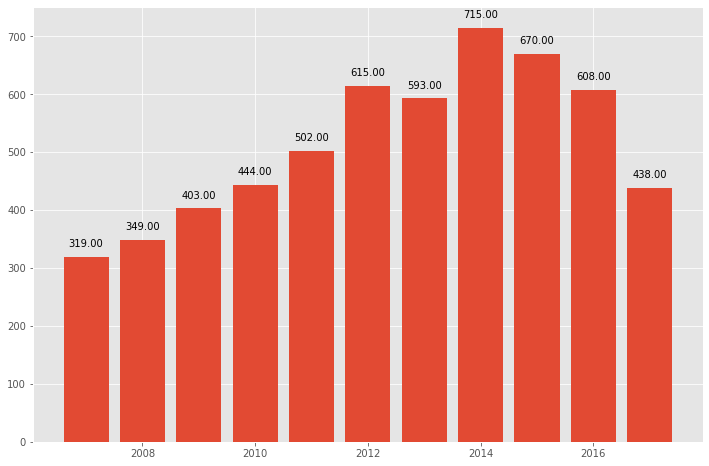

In [191]:
xs= setperyear['year']
ys= setperyear['set_num']

plt.bar(xs,ys)

for x,y in zip(xs,ys):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center')

    # visualizing the plot
plt.show()
plt.show()

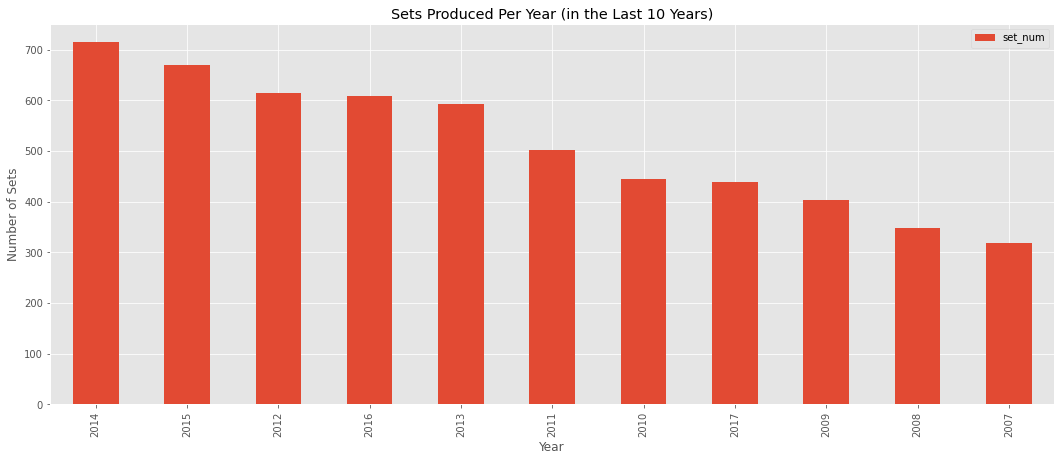

In [192]:
setperyear.plot(kind= 'bar',figsize=(18,7),x='year',y='set_num',title = 'Sets Produced Per Year (in the Last 10 Years)',
           xlabel = 'Year', ylabel = 'Number of Sets')
plt.show()